In [85]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

print("필용한 라이브러리 import 완료!")

필용한 라이브러리 import 완료!


In [86]:
# 이미지 크기 조정함수

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

학습 데이터 크기 조정

In [89]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train/rock/"
resize_images(image_dir_path) 
print("바위 이미지 resize 완료!")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!
200  images to be resized.
200  images resized.
바위 이미지 resize 완료!
200  images to be resized.
200  images resized.
보 이미지 resize 완료!


이미지에 라벨링 작업함수

In [90]:
import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

라벨링 작업

In [91]:
#train
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train"
(x_train, y_train)=load_data(image_dir_path, 600)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


라벨:  0


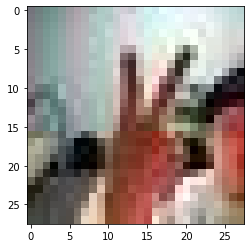

In [92]:
plt.imshow(x_train[1])
print('라벨: ', y_train[3])

In [80]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_9 (Dense)              (

In [93]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

Before Reshape - x_train_norm shape: (600, 28, 28, 3)
After Reshape - x_train_reshaped shape: (600, 28, 28, 3)


딥러닝 네트워크 학습시키기
잘 설계가 되었다면, 이제 학습을 시켜봅시다. 아마도 여러분들의 데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.

In [94]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=15)

Epoch 1/15
19/19 [==============================] - 0s 3ms/step - loss: 0.1982 - accuracy: 0.9383
Epoch 2/15
19/19 [==============================] - 0s 3ms/step - loss: 0.1783 - accuracy: 0.9350
Epoch 3/15
19/19 [==============================] - 0s 3ms/step - loss: 0.1567 - accuracy: 0.9500
Epoch 4/15
19/19 [==============================] - 0s 3ms/step - loss: 0.1517 - accuracy: 0.9550
Epoch 5/15
19/19 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.9617
Epoch 6/15
19/19 [==============================] - 0s 3ms/step - loss: 0.1229 - accuracy: 0.9600
Epoch 7/15
19/19 [==============================] - 0s 3ms/step - loss: 0.1183 - accuracy: 0.9683
Epoch 8/15
19/19 [==============================] - 0s 3ms/step - loss: 0.1051 - accuracy: 0.9633
Epoch 9/15
19/19 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.9717
Epoch 10/15
19/19 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9717
Epoch 11/15
19/19 [

테스트 데이터

In [100]:
image_dir_path =  "./rock_scissor_paper_test/"
(x_test, y_test)=load_data(image_dir_path,300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 200 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


테스트 데이터 크기조정

In [99]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test/rock"
resize_images(image_dir_path) 
print("바위 이미지 resize 완료!")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [ ]:
# 데이터 크기 조절은 scissors , rock , paper 해당 위치까지 들어가야 함

라벨:  1


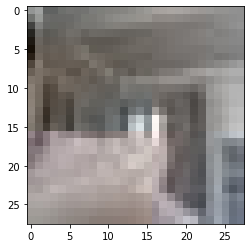

In [101]:
plt.imshow(x_test[1])
print('라벨: ', y_test[1])

In [102]:
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [103]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.3780 - accuracy: 0.3133
test_loss: 2.3780369758605957 
test_accuracy: 0.31333333253860474
